# Time series analysis for eurusd 15m data

In [22]:
pip install pandas numpy matplotlib pmdarima

Note: you may need to restart the kernel to use updated packages.


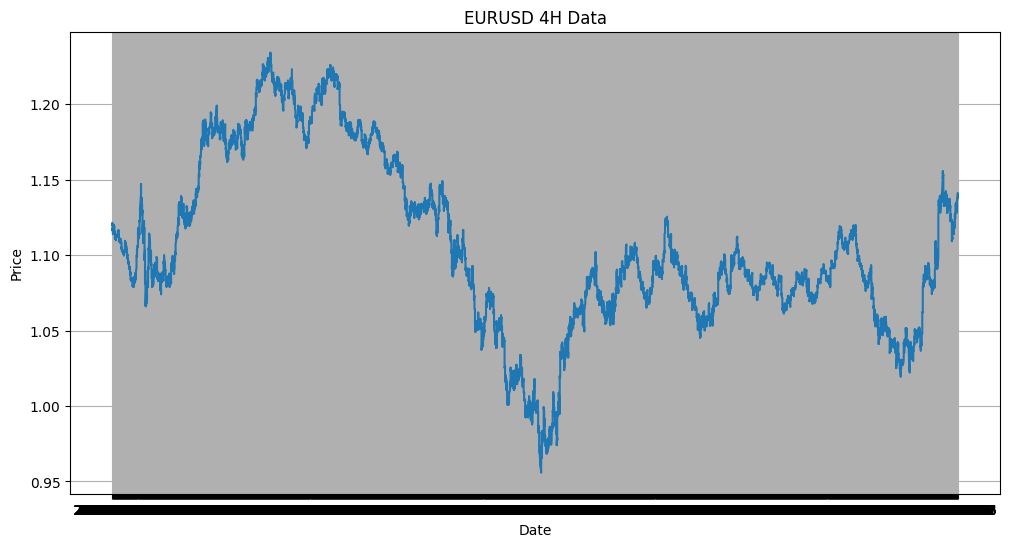

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv("/kaggle/input/eurusd-4h-tsa/eurusd 4h.csv")

plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["close"], label='Close Price')
plt.title('EURUSD 4H Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [24]:
print(df.describe())
# df['close'].describe()
print(df.isnull().sum())

              open         high          low        close         volume  \
count  8684.000000  8684.000000  8684.000000  8684.000000    8684.000000   
mean      1.106161     1.107615     1.104719     1.106175   12465.626670   
std       0.057499     0.057347     0.057645     0.057494   10711.784067   
min       0.955790     0.958730     0.953570     0.955780       1.000000   
25%       1.071357     1.072828     1.070028     1.071343    5416.000000   
50%       1.092680     1.093955     1.091350     1.092685    9437.000000   
75%       1.143340     1.144667     1.141535     1.143340   16148.500000   
max       1.234020     1.234940     1.232180     1.234030  130508.000000   

            spread  
count  8684.000000  
mean     14.499309  
std      20.904225  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%      50.000000  
max      76.000000  
Date      0
Time      0
open      0
high      0
low       0
close     0
volume    0
spread    0
dtype: int64


Additive seasonal decompose


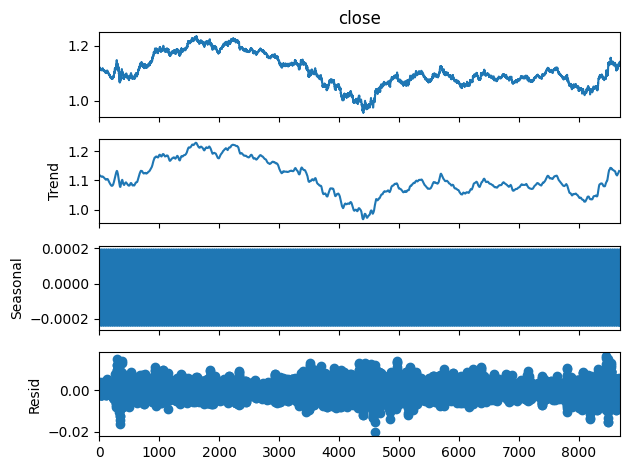

Multiplicative seasonal decompose


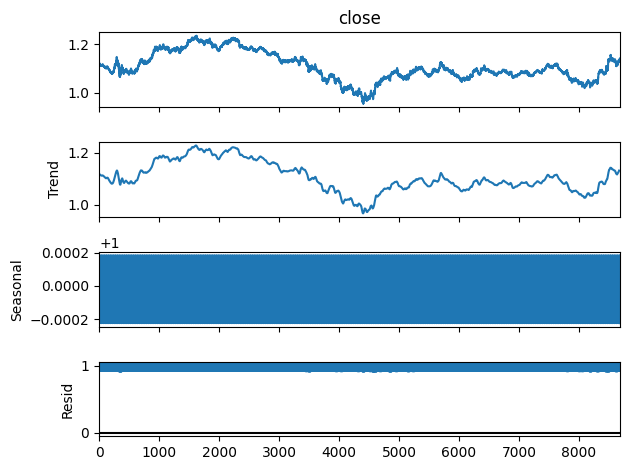

STL decompose


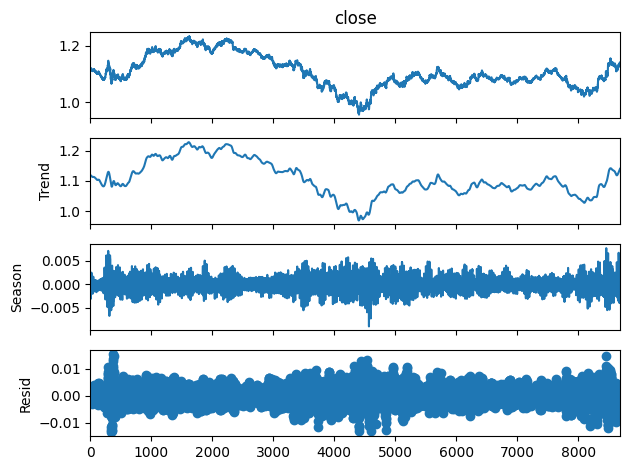

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import pandas as pd

decomposition_additive=seasonal_decompose(df['close'], model='additive', period=30) #Additive
decomposition_multiplicative=seasonal_decompose(df['close'], model='multiplicative', period=30) #Multiplicative
decomposition_stl=STL(df['close'], period=30) #STL
stl_fit=decomposition_stl.fit()

print("Additive seasonal decompose")
# plt.rcParams.update({'figure.figsize:', (10,8)})
decomposition_additive.plot()
plt.tight_layout()
plt.show()

print("Multiplicative seasonal decompose")
# plt.rcParams.update({'figure.figsize:', (10,8)})
decomposition_multiplicative.plot()
plt.tight_layout()
plt.show()

print('STL decompose')
stl_fig=stl_fit.plot()
plt.show()

In [26]:
#Stationarity test using ADF and KPSS
from statsmodels.tsa.stattools import adfuller, kpss
adf_test=adfuller(df['close'])
print('ADF test result')
print(f'ADF statistics: {round(adf_test[0],3)}')
print(f'ADF test"s p-value: {round(adf_test[1],3)}')

kpss_test=kpss(df['close'])
print("Kpss test result")
print(f'KPSS statistics: {round(kpss_test[0],1)}')
print(f'KPSS test"s p-value: {round(kpss_test[1],3)}')

ADF test result
ADF statistics: -1.676
ADF test"s p-value: 0.444
Kpss test result
KPSS statistics: 5.9
KPSS test"s p-value: 0.01


/tmp/ipykernel_55/940235749.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test=kpss(df['close'])


In [27]:
#Making data stationary
close_price=df['close']
print("Close price after first order differencing")
FOD=close_price.diff().dropna()
print(FOD)

Close price after first order differencing
1       0.00107
2      -0.00189
3      -0.00267
4       0.00030
5       0.00062
         ...   
8679    0.00121
8680    0.00367
8681   -0.00222
8682   -0.00121
8683    0.00044
Name: close, Length: 8683, dtype: float64


In [28]:
#Now check stationarity for close price after differencing
from statsmodels.tsa.stattools import adfuller, kpss

adf_test=adfuller(FOD)
print('ADF test result')
print(f'ADF statistics: {round(adf_test[0],3)}')
print(f'ADF test"s p-value: {round(adf_test[1],3)}')

kpss_test=kpss(FOD)
print("Kpss test result")
print(f'KPSS statistics: {round(kpss_test[0],1)}')
print(f'KPSS test"s p-value: {round(kpss_test[1],3)}')

ADF test result
ADF statistics: -55.482
ADF test"s p-value: 0.0
Kpss test result
KPSS statistics: 0.1
KPSS test"s p-value: 0.1


/tmp/ipykernel_55/1173763850.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test=kpss(FOD)


### Now the data is stationary of close price after first order differencing

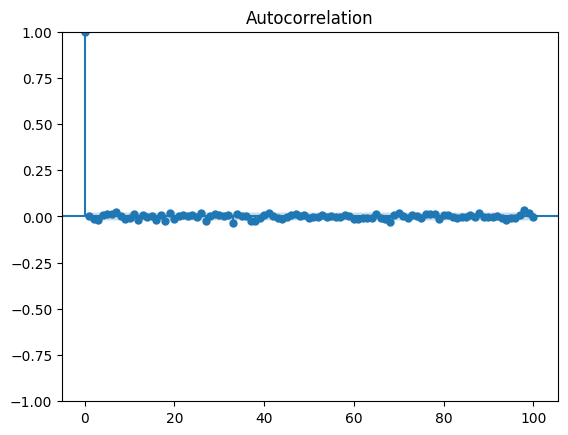

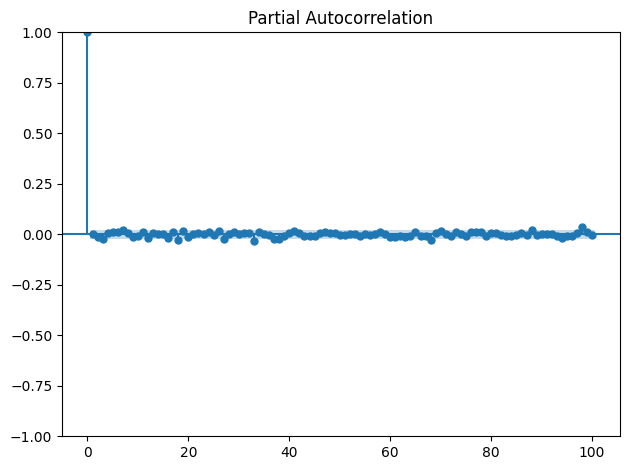

In [29]:
#Now checking for white noise and random walk using acf and pacf plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# plot_acf(df['close'], lags=50)
# plot_pacf(df['close'], lags=50)
plot_acf(FOD, lags=100)
plot_pacf(FOD, lags=100)
plt.tight_layout()
plt.show()

In [30]:
from statsmodels.stats.diagnostic import acorr_ljungbox

res_1=acorr_ljungbox(df['close'], lags=[200], return_df=True)
res_2=acorr_ljungbox(FOD, lags=[200], return_df=True)
print(res_1)
print(res_2)

          lb_stat  lb_pvalue
200  1.542242e+06        0.0
        lb_stat  lb_pvalue
200  226.048854   0.099775


8653
8682


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

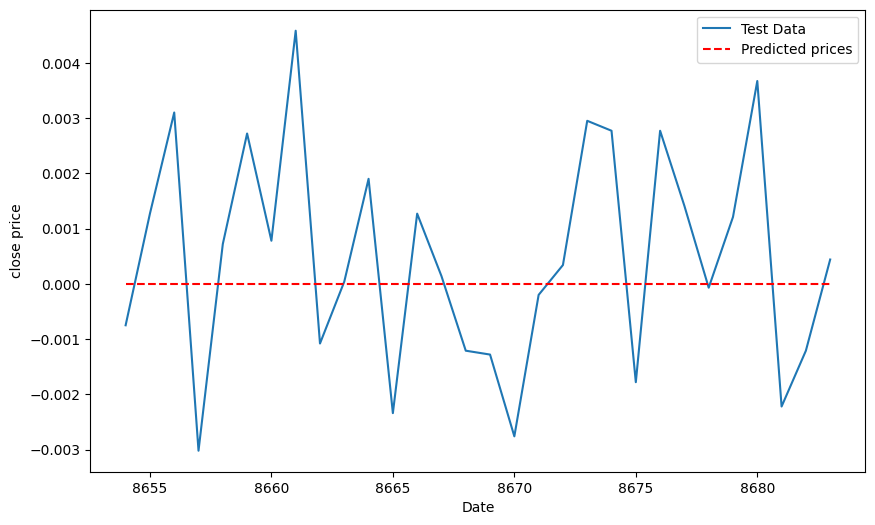

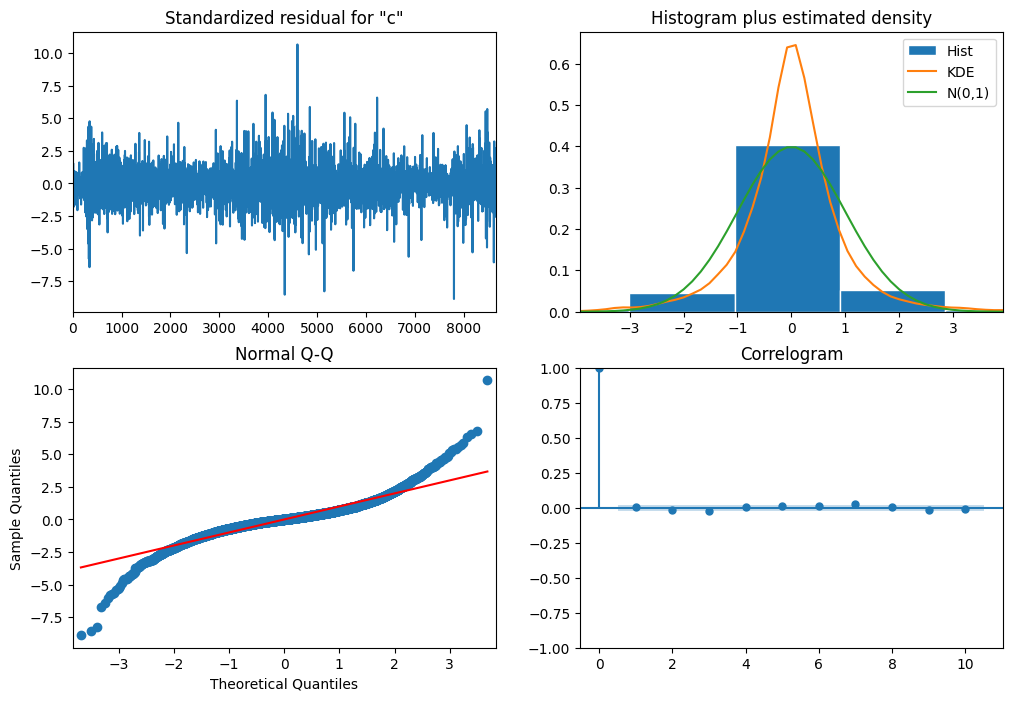

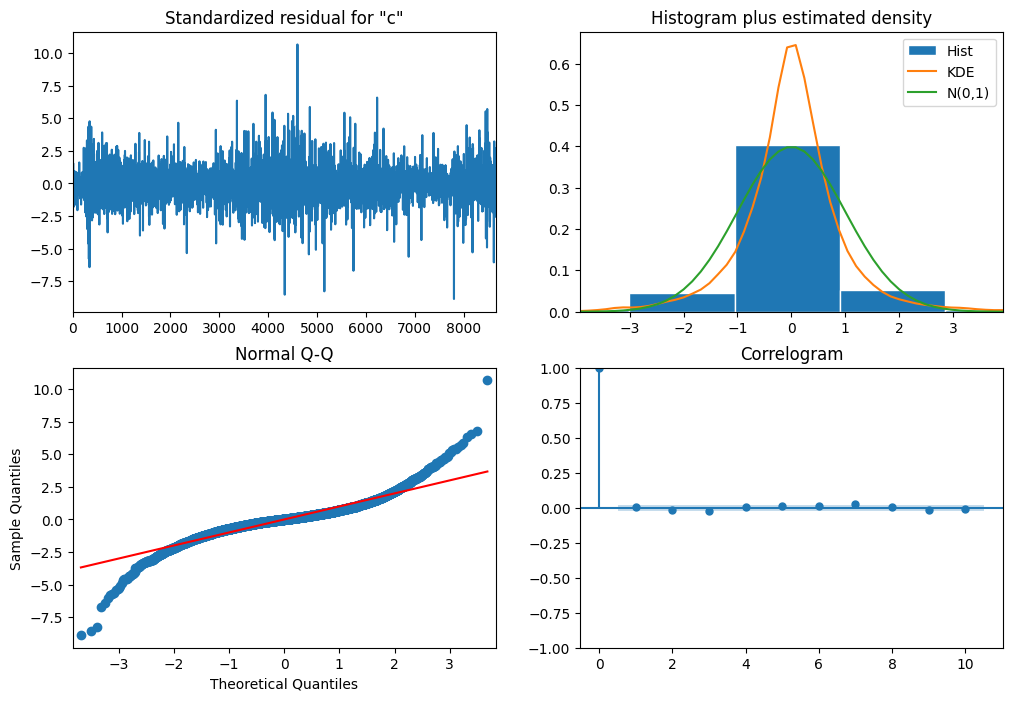

In [38]:
#Splitting train and test data
train_data, test_data = FOD[:-30], FOD[-30:]
print(len(train_data))
print(len(train_data) + len(test_data) -1)

#Now forecasting ARIMA model using p=2, q=52 on already differenced data of close price
from statsmodels.tsa.arima.model import ARIMA

model_arima=ARIMA(train_data, order=(1,0,1))
model_arima_fit=model_arima.fit()

#Make predictions
prediction_arima=model_arima_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) -1,
    dynamic=False
)

plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, prediction_arima, color='red', linestyle="--", label='Predicted prices')
plt.xlabel('Date')
plt.ylabel('close price')
plt.legend()
plt.show()

# Assuming 'model_fit' is your best ARIMA model
model_arima_fit.plot_diagnostics(figsize=(12, 8))

8654
8683


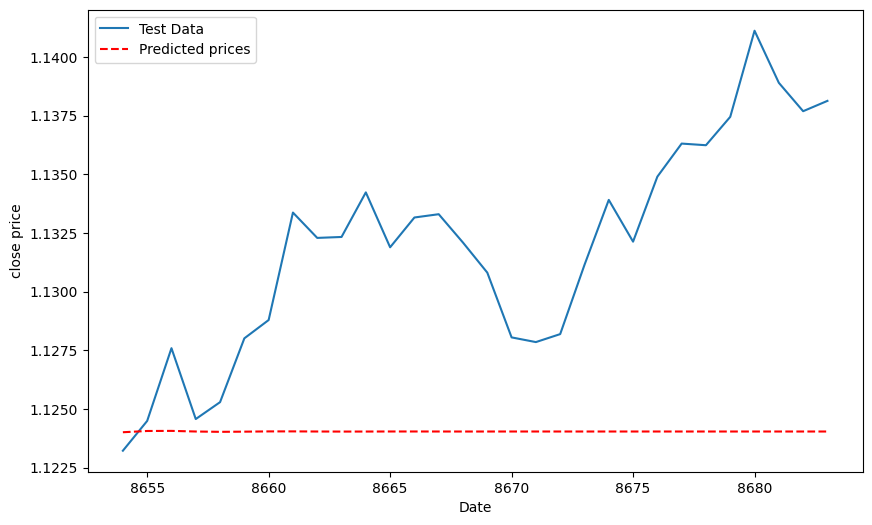

NameError: name 'model_fit' is not defined

In [32]:
#Splitting train and test data of pure close price
train_data, test_data = close_price[:-30], close_price[-30:]
print(len(train_data))
print(len(train_data) + len(test_data) -1)

#Now forecasting ARIMA model using p=2, q=52 
from statsmodels.tsa.arima.model import ARIMA

model_arima=ARIMA(train_data, order=(2,1,2))
model_arima_fit=model_arima.fit()

#Make predictions
prediction_arima=model_arima_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) -1,
    dynamic=False
)

plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, prediction_arima, color='red', linestyle="--", label='Predicted prices')
plt.xlabel('Date')
plt.ylabel('close price')
plt.legend()
plt.show()

# Assuming 'model_fit' is your best ARIMA model
model_fit.plot_diagnostics(figsize=(12, 8))

In [34]:
#To find best fit model for arima automatically
from pmdarima import auto_arima

auto_model = auto_arima(train_data, seasonal=False, stepwise=True, trace=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-82032.109, Time=11.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-82035.883, Time=1.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-82033.913, Time=0.93 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-82033.912, Time=1.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-82037.883, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-82031.882, Time=2.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 17.754 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8654
Model:               SARIMAX(0, 1, 0)   Log Likelihood               41019.941
Date:                Tue, 03 Feb 2026   AIC                         -82037.883
Time:                        06:31:13   BIC                         -82030.817
Sample:                             0   HQIC                        -82035.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:1901: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [35]:
#To find best fit model for arima automatically
from pmdarima import auto_arima

auto_model = auto_arima(train_data, seasonal=True, stepwise=True, trace=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-82032.109, Time=6.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-82035.883, Time=1.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-82033.913, Time=0.92 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-82033.912, Time=1.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-82037.883, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-82031.882, Time=2.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 12.886 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8654
Model:               SARIMAX(0, 1, 0)   Log Likelihood               41019.941
Date:                Tue, 03 Feb 2026   AIC                         -82037.883
Time:                        06:31:44   BIC                         -82030.817
Sample:                             0   HQIC                        -82035.4

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:1901: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
